In [7]:
import pandas as pd 
import cv2
import imutils 
import os 
from os import listdir
from matplotlib import pyplot as plt

In [14]:
csv_path='../dataset/train.csv'
image_dir='../dataset/Train Images/'
flip_dir='../dataset/train_flipped/'

In [3]:
labels=pd.read_csv(csv_path)
labels.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [5]:
image_paths=[]
for file in listdir(image_dir):
    image_paths.append(image_dir+file)

In [29]:
flipped_labels=[]
for i in range(len(labels)):
    img=cv2.imread(image_dir+labels['Image'][i])
    img=cv2.flip(img,1)
    name=labels['Image'][i][:-4]
    flipped_labels.append([name+'_flip.jpg',labels['Class'][i]])
    cv2.imwrite(flip_dir+name+'_flip.jpg',img)
    
# for i in image_paths:
#     img=cv2.imread(i)
#     img=cv2.flip(img,1)
#     name=i.split('/')[-1][:-4]
#     cv2.imwrite(flip_dir+name+'_flip.jpg',img)

image7042 Food
image3327 misc
image10335 Attire
image8019 Food
image2128 Attire
image1106 misc
image6750 Food
image5508 Food
image9571 Food
image9613 Food
image1719 Attire
image61 Decorationandsignage
image10285 Food
image129 Decorationandsignage
image6760 Food
image192 Food
image2008 Attire
image3892 misc
image9817 Food
image3123 Food
image5544 Attire
image1854 Decorationandsignage
image9015 Attire
image5318 Food
image6328 Food
image6553 misc
image8453 Attire
image10333 Attire
image8262 Attire
image8146 misc
image9397 Attire
image2808 Attire
image9384 Decorationandsignage
image3467 misc
image7522 Decorationandsignage
image5373 Attire
image3640 Decorationandsignage
image9556 Attire
image6311 Food
image1265 Food
image4189 Decorationandsignage
image5948 Food
image9184 Food
image3049 misc
image299 Attire
image748 Food
image7626 Food
image137 misc
image6276 Decorationandsignage
image915 Decorationandsignage
image3861 Decorationandsignage
image6047 Food
image9657 Attire
image6031 Attire
ima

image6459 Food
image4482 Food
image9507 Food
image9052 Decorationandsignage
image9282 misc
image2486 Attire
image3492 Attire
image4817 misc
image3629 Food
image10286 Attire
image10154 Food
image5795 Food
image9239 Food
image2086 misc
image1438 Food
image9336 misc
image9385 Attire
image8906 misc
image2734 misc
image5642 Decorationandsignage
image8002 Food
image3555 Food
image9358 misc
image10035 Attire
image10180 Attire
image9326 Food
image10856 misc
image3180 Attire
image1676 Food
image9625 Attire
image2942 Attire
image3138 misc
image6893 Attire
image2235 Attire
image2724 Decorationandsignage
image8979 Attire
image2285 Decorationandsignage
image6217 Food
image7567 Food
image2733 misc
image3261 Decorationandsignage
image8483 Attire
image1701 Attire
image629 Food
image3787 Food
image3258 Food
image4075 Food
image3573 Food
image2898 misc
image4891 misc
image7278 Attire
image650 misc
image1156 misc
image6973 Food
image2017 Food
image3673 Attire
image6612 Attire
image9399 Food
image9198 mis

image5298 misc
image3158 Attire
image6241 Food
image3816 Attire
image6279 Food
image9488 misc
image10550 Decorationandsignage
image4312 misc
image5960 Food
image1446 Attire
image3165 Food
image4370 misc
image4292 Attire
image657 Food
image2166 Decorationandsignage
image4761 Food
image7871 Food
image1759 misc
image7165 Food
image11 Decorationandsignage
image2099 misc
image2270 Attire
image1210 Decorationandsignage
image5703 Attire
image8436 Food
image3365 Food
image5200 Attire
image5469 Food
image4462 Food
image4483 Decorationandsignage
image4649 Attire
image2293 Decorationandsignage
image4735 Attire
image2746 Attire
image2341 misc
image5720 Attire
image1735 misc
image10687 misc
image10540 Attire
image10790 Decorationandsignage
image6373 Decorationandsignage
image2860 misc
image231 Food
image9818 Attire
image4157 misc
image9544 Attire
image6599 Food
image9620 Food
image4548 misc
image6414 Decorationandsignage
image10703 Food
image6158 misc
image8501 Food
image7502 Food
image2607 Decorat

image4576 Food
image9138 Decorationandsignage
image6966 Decorationandsignage
image7249 Food
image7836 misc
image2589 Attire
image8509 Food
image10868 Food
image7855 Food
image7053 misc
image9860 misc
image6117 Food
image5727 Food
image4425 misc
image2466 Food
image53 Food
image6386 Food
image7885 Attire
image2886 misc
image1473 misc
image442 Decorationandsignage
image3927 Food
image398 Attire
image7593 Food
image7591 Attire
image8195 Food
image1568 Food
image1936 Food
image10030 Attire
image8696 Attire
image2206 Attire
image9323 Attire
image8249 Attire
image5929 misc
image8035 misc
image1713 Food
image5419 Food
image10839 Food
image9217 Attire
image429 Attire
image6939 misc
image8046 Food
image9489 misc
image4979 Food
image10890 Food
image7546 Decorationandsignage
image4463 misc
image7713 Attire
image6569 misc
image2188 Food
image443 Attire
image9984 Attire
image4657 Decorationandsignage
image7843 Attire
image7833 Decorationandsignage
image8252 misc
image406 Decorationandsignage
image4

image7769 Attire
image7257 Attire
image2662 misc
image9027 Food
image4267 Attire
image5342 Food
image4236 Attire
image10232 misc
image5512 Food
image3414 Attire
image4273 misc
image969 misc
image2527 Food
image4353 Attire
image1442 misc
image5320 Food
image912 misc
image6106 Food
image4097 Attire
image10681 misc
image10264 misc
image7439 Attire
image482 Decorationandsignage
image9954 misc
image3589 Attire
image10189 Decorationandsignage
image1183 Decorationandsignage
image8459 Food
image10448 Attire
image10572 Food
image3413 misc
image3761 Attire
image8181 Food
image1445 Food
image1991 Food
image10343 Attire
image3793 Food
image5869 Food
image9742 Attire
image6229 Food
image8683 Decorationandsignage
image7282 Food
image3159 misc
image9582 Food
image10405 Attire
image10726 Attire
image10068 Decorationandsignage
image6154 Food
image5576 Attire
image8448 misc
image6190 Food
image4413 Attire
image9855 Attire
image3048 Food
image2455 Food
image9093 Attire
image2752 Food
image8925 Food
image

image3904 misc
image6602 Decorationandsignage
image10323 Attire
image4 Attire
image10849 Food
image3360 Food
image756 Attire
image9164 Attire
image3588 Food
image525 Food
image10199 misc
image3633 Food
image2438 misc
image694 Food
image10243 Food
image3815 Food
image7210 Food
image1272 Food
image3583 Attire
image4208 Food
image5933 Food
image8799 Attire
image8990 misc
image9302 misc
image2743 Food
image8718 Attire
image1786 Food
image9886 Attire
image8722 Attire
image5831 Attire
image10033 Food
image6327 Attire
image3696 Decorationandsignage
image97 misc
image6180 misc
image3479 Food
image9807 Food
image4328 misc
image1782 Food
image4507 Food
image10655 Food
image1485 Food
image6883 Attire
image10129 Food
image10677 Decorationandsignage
image4844 Attire
image3161 misc
image6150 misc
image8100 Attire
image7921 Food
image8899 Food
image3743 misc
image9809 Attire
image7054 Attire
image9439 Attire
image5014 Decorationandsignage
image9073 Food
image10665 Attire
image1371 Decorationandsignag

image2567 Food
image2418 Attire
image385 misc
image4285 Food
image7476 Food
image693 Attire
image7683 misc
image2294 Decorationandsignage
image4865 misc
image2488 Food
image4036 Food
image501 Decorationandsignage
image5428 Attire
image10514 misc
image10472 Food
image7553 misc
image10592 Attire
image9891 Attire
image5061 Decorationandsignage
image6303 misc
image8637 Food
image1694 Decorationandsignage
image10382 Decorationandsignage
image1115 Food
image7181 Food
image582 Attire
image7773 misc
image5175 Food
image2831 Attire
image189 Decorationandsignage
image5875 Attire
image6152 Attire
image6334 Decorationandsignage
image3857 Food
image4816 Food
image2396 Food
image8507 Decorationandsignage
image1025 Decorationandsignage
image7849 Food
image6938 Food
image1697 Food
image1349 Decorationandsignage
image10320 Food
image5907 Food
image2905 Food
image7271 misc
image9390 Food
image10466 misc
image7103 Attire
image4191 Food
image5286 Attire
image6552 Food
image6411 Decorationandsignage
image3

image8860 Food
image8850 misc
image5258 misc
image3959 Decorationandsignage
image7542 Attire
image8111 Attire
image6283 Food
image7226 misc
image9856 Food
image7741 Decorationandsignage
image4622 Decorationandsignage
image9926 Food
image7357 misc
image8307 Attire
image3546 Food
image9320 Food
image10689 misc
image817 Attire
image4162 Attire
image4121 misc
image1925 Attire
image529 Attire
image9536 Attire
image4136 Food
image2577 misc
image10054 Decorationandsignage
image4694 Attire
image10438 Food
image6198 misc
image3763 Decorationandsignage
image7361 misc
image5035 Attire
image3947 Food
image8871 Decorationandsignage
image1434 Attire
image7541 Decorationandsignage
image4300 Attire
image1739 misc
image10104 Food
image7724 Decorationandsignage
image5387 Attire
image8139 Attire
image4574 misc
image2992 Food
image7359 Attire
image10463 Attire
image9468 Food
image9608 Decorationandsignage
image1134 Decorationandsignage
image2519 Attire
image8376 Food
image276 Attire
image6412 Decorationan

image5229 Food
image9195 Food
image9431 Attire
image7025 Attire
image10553 Food
image9317 Food
image3656 Food
image610 Decorationandsignage
image9298 Attire
image4964 Attire
image2525 Decorationandsignage
image3663 Attire
image9674 Food
image6375 misc
image7113 misc
image1326 misc
image5065 Food
image2515 Decorationandsignage
image2322 misc
image10270 Attire
image2880 Attire
image4402 misc
image10878 Food
image4698 Food
image4006 misc
image8576 Attire
image4004 Food
image2219 Decorationandsignage
image1957 Food
image7824 Food
image9196 Decorationandsignage
image8184 misc
image2887 Attire
image6753 Food
image8574 Food
image5018 misc
image6382 Food
image6195 Food
image9241 Attire
image2036 Decorationandsignage
image5509 Food
image9212 Food
image10629 Decorationandsignage
image5278 Decorationandsignage
image10280 misc
image8798 Food
image4037 misc
image2874 Decorationandsignage
image1817 misc
image3189 Food
image10801 Attire
image1226 Attire
image2105 misc
image10190 misc
image7012 Food
i

image8712 Food
image9413 misc
image7840 Food
image5051 misc
image9574 Attire
image7931 Attire
image5816 Food
image7858 Food
image8255 Food
image8738 Decorationandsignage
image8960 Food
image2251 Food
image1295 Food
image5952 Attire
image4051 Food
image2212 Food
image6440 Attire
image1113 Attire
image5886 Attire
image3366 misc
image6425 Attire
image1205 Attire
image3902 misc
image6340 Food
image9962 Attire
image9850 Food
image4956 Decorationandsignage
image7654 Food
image5764 Food
image10108 Attire
image9723 misc
image8484 misc
image10679 Food
image9400 misc
image7696 Food
image1301 Attire
image8281 Food
image1845 Attire
image9752 Food
image8076 Attire
image4238 Attire
image5457 Food
image1089 Attire
image780 Food
image1046 Food
image1317 Food
image1750 misc
image7240 misc
image3910 Food
image9588 Food
image5676 Food
image2501 Decorationandsignage
image7958 Food
image9444 Attire
image2967 misc
image9134 Food
image10494 Attire
image2318 Attire
image9784 Food
image10805 Decorationandsigna

image6496 Food
image4703 Attire
image8371 Food
image8308 misc
image6299 Attire
image2364 misc
image5115 Food
image3042 Food
image5847 Attire
image10728 Attire
image5887 Food
image6731 Food
image8492 Attire
image4586 Attire
image3719 Decorationandsignage
image2686 Food
image7988 Attire
image7999 Food
image10699 misc
image9328 misc
image1173 Attire
image6365 Food
image1823 misc
image320 Decorationandsignage
image6529 Decorationandsignage
image4150 Food
image6157 Decorationandsignage
image5336 Food
image7376 Decorationandsignage
image1949 Food
image123 Attire
image1861 misc
image9658 Attire
image6748 Food
image8385 Attire
image5598 Decorationandsignage
image3911 Food
image3849 Food
image3334 Food
image10086 Decorationandsignage
image6821 Decorationandsignage
image1336 Food
image5033 misc
image1380 Decorationandsignage
image919 Decorationandsignage
image8747 Attire
image7358 Attire
image4637 Attire
image5695 misc
image6329 Attire
image1139 Food
image2812 Attire
image7046 Food
image2913 Foo

image7515 Decorationandsignage
image8817 Food
image4525 misc
image3313 misc
image7718 misc
image9151 Food
image6351 Attire
image9486 Food
image8409 Attire
image8504 Food
image6344 Decorationandsignage
image2968 Food
image1411 Food
image2229 Food
image10078 Food
image4734 Food
image9186 Food
image2366 Food
image6159 Attire
image8225 misc
image3519 Food
image7374 Attire
image1865 Food
image9714 Food
image4229 misc
image10445 misc
image4579 Food
image5791 Decorationandsignage
image5454 Food
image5028 misc
image9469 Food
image8006 Attire
image5863 Food
image4840 Attire
image805 Food
image5285 Food
image9880 Decorationandsignage
image2648 Attire
image9267 Food
image4021 Attire
image7960 Decorationandsignage
image60 Attire
image5971 Decorationandsignage
image6838 Food
image7422 Food
image10843 Attire
image6933 misc
image8893 misc
image8284 Food
image6557 Decorationandsignage
image2498 Food
image606 Attire
image7554 Attire
image2966 misc
image10265 Food
image7980 misc
image2532 Attire
image55

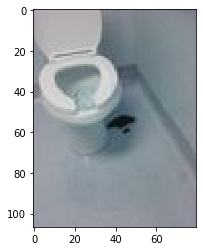

In [10]:
img=cv2.imread(image_paths[2])
plt.imshow(img)

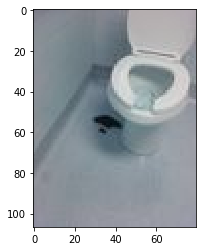

In [34]:
flipped_df=pd.DataFrame(flipped_labels, columns=labels.columns)

In [42]:
merged_df=labels.append(flipped_df)

In [43]:
merged_df.shape

(11966, 2)

In [44]:
merged_df.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [45]:
merged_df.to_csv('../dataset/original_and_flipped.csv', index=False)

In [53]:
data=pd.read_csv('../dataset/original_and_flipped.csv')

In [54]:
data.shape

(11966, 2)

In [62]:
import random 
from sklearn.utils import shuffle


In [90]:
random.seed(9)
data=shuffle(data)
train=data.iloc[:10000,]
test=data.iloc[10000:,]
train.groupby(by=['Class']).count()

,Image
Class,
Attire,2809
Decorationandsignage,1241
Food,3854
misc,2096


,Image
Class,
Attire,2799
Decorationandsignage,1230
Food,3818
misc,2153


In [78]:
test.groupby(by=['Class']).count()

,Image
Class,
Attire,579
Decorationandsignage,220
Food,734
misc,433
